In [7]:
!pip install numpy matplotlib tqdm scikit-learn tensorflow numpy

In [57]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [8]:
file_list = os.listdir('./data') # ./data 에 어떤 파일들이 존재하는지 확인하기
file_list

['Test', 'Test.csv', 'Meta', 'Train', 'Meta.csv', 'Train.csv']

In [12]:
!pip install pandas

import pandas as pd

df_Meta = pd.read_csv('./data/Meta.csv')
df_Meta

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 10.1 MB/s  0:00:01 eta 0:00:01:0101m
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]━━━━━━━━━━━ 2/3 [pandas]


,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


[<PIL.Image.Image image mode=RGB size=100x87 at 0x13F4141C0>, <PIL.Image.Image image mode=RGB size=100x100 at 0x13E9F6F80>, <PIL.Image.Image image mode=RGB size=100x100 at 0x13F452560>, <PIL.Image.Image image mode=RGB size=100x100 at 0x13F477730>, <PIL.Image.Image image mode=RGB size=100x88 at 0x13F4C06D0>, <PIL.Image.Image image mode=RGB size=100x100 at 0x13F4E5870>, <PIL.Image.Image image mode=RGB size=100x89 at 0x13F5127D0>, <PIL.Image.Image image mode=RGB size=100x100 at 0x13F53FA00>, <PIL.Image.Image image mode=RGB size=100x100 at 0x13F5849A0>, <PIL.Image.Image image mode=RGB size=100x100 at 0x13F5A5C60>, <PIL.Image.Image image mode=RGB size=100x100 at 0x13F5D2BC0>, <PIL.Image.Image image mode=RGB size=100x88 at 0x13F5FBD00>, <PIL.Image.Image image mode=RGB size=100x88 at 0x13F640CA0>, <PIL.Image.Image image mode=RGB size=100x100 at 0x13F675E10>, <PIL.Image.Image image mode=RGB size=100x88 at 0x13F695DE0>, <PIL.Image.Image image mode=RGB size=100x88 at 0x13F6C3F70>, <PIL.Image.Ima

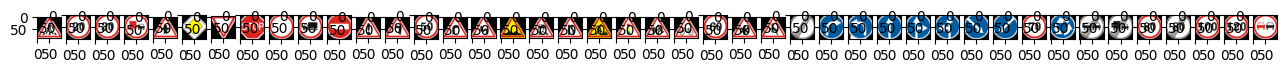

In [16]:
Meta_images = []
Meta_labels = []

plt.figure(figsize=(16,16))
for i in range(len(df_Meta)):
    img = load_img('./data/'+df_Meta['Path'][i])
    plt.subplot(1, len(df_Meta), i+1)
    plt.imshow(img)
    Meta_images.append(img)
    Meta_labels.append(df_Meta['ClassId'][i])
    
print(Meta_images)


In [44]:
df_Train = pd.read_csv('./data/Train.csv')
# df_Train
df_Train.iloc[0]
df_Train.head(1)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png


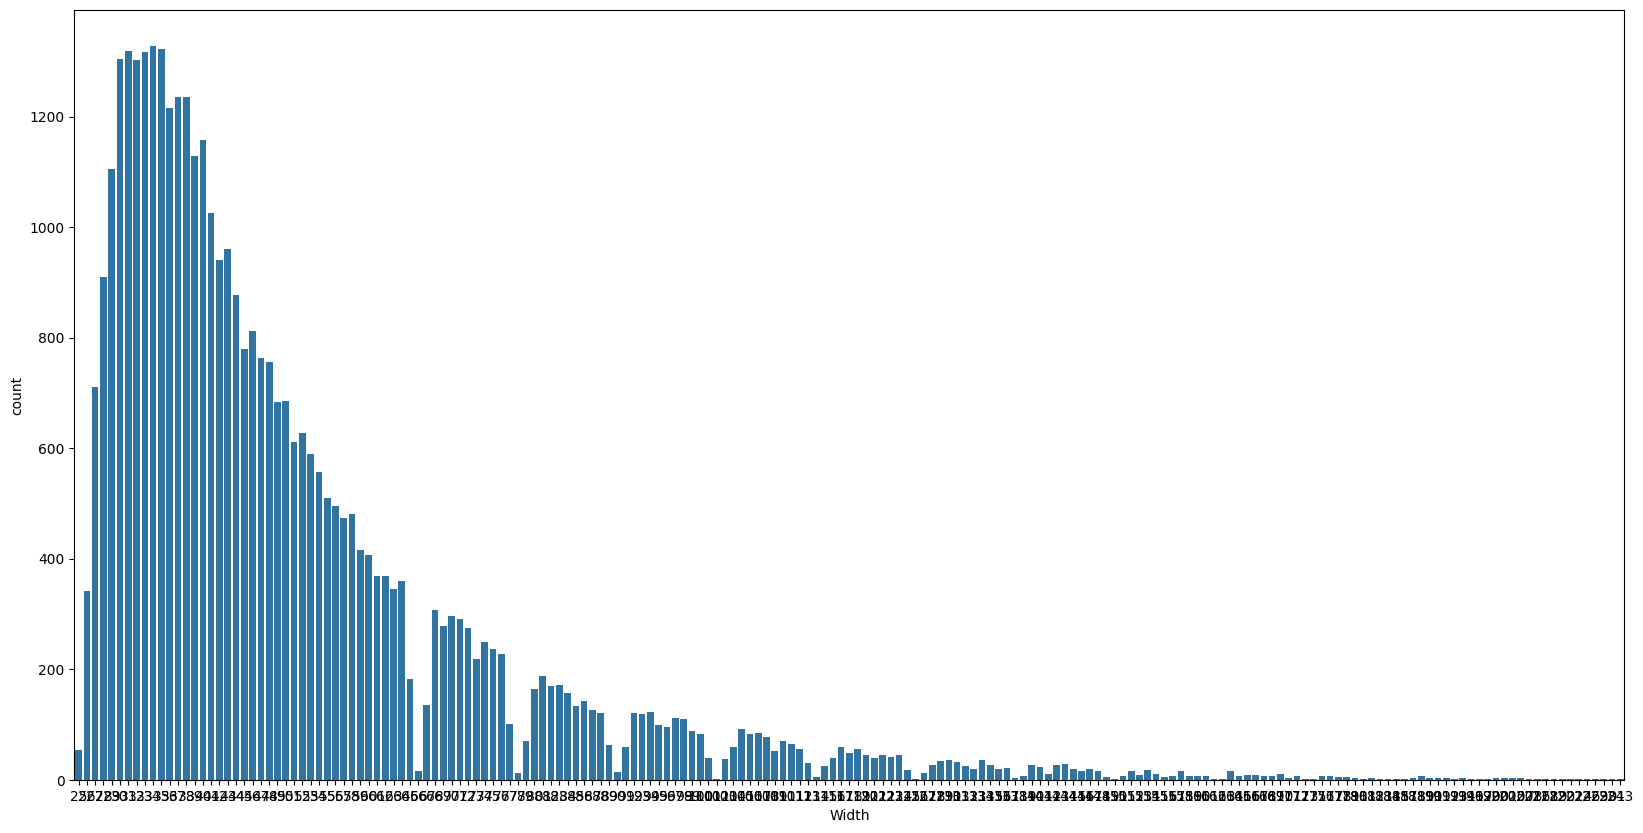

In [20]:
!pip install seaborn
import seaborn as sns

plt.figure(figsize=(20,10))
ax = sns.countplot(x="Width", data=df_Train)

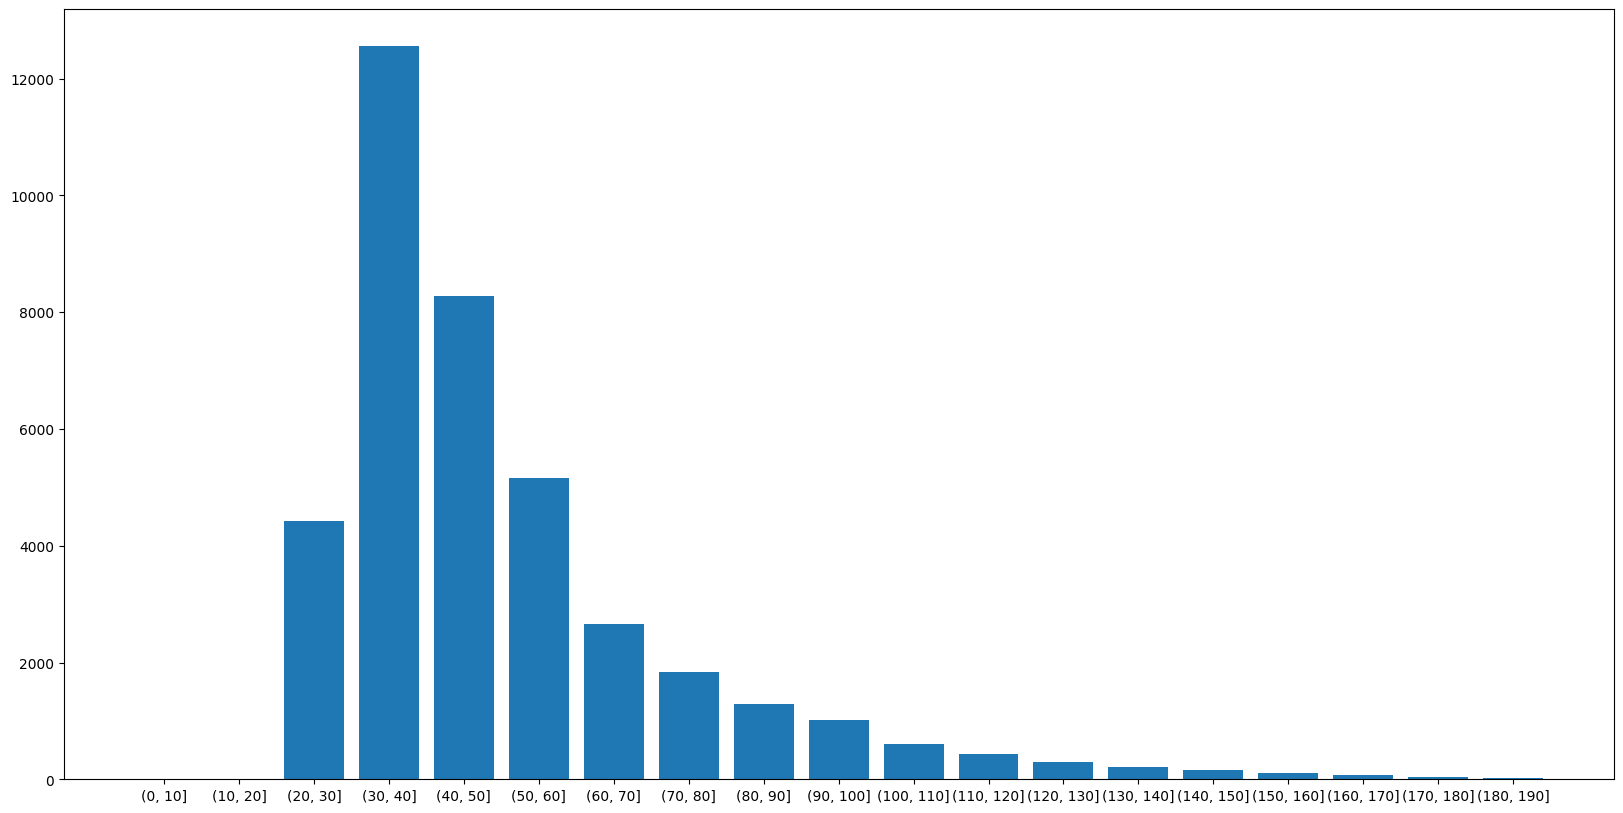

실행


In [26]:
df_cutWidth = pd.cut(df_Train['Width'], np.arange(0,200,10)).value_counts(sort=False)

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(range(len(df_cutWidth)), df_cutWidth.values)
ax.set_xticks(range(len(df_cutWidth)))
ax.set_xticklabels(df_cutWidth.index)

plt.show()

In [25]:
image_height = 33
image_width = 33
image_channel = 3 # 컬러 이미지이기에 3채널

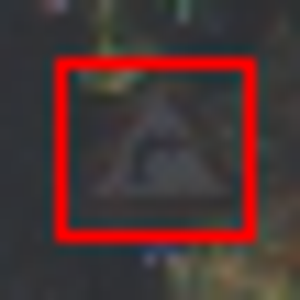

In [58]:
from PIL import Image
from PIL import ImageDraw

img_sample = Image.open('./data/'+df_Train['Path'][0]) # Load the first image from the training set
#img_sample = img_sample.convert("RGB") # Convert to RGB if not already in that mode
#img_sample = img_sample.resize((image_width, image_height)) # Resize the image to the specified dimensions
#img_sample  # Draw a rectangle on the image to visualize the ROI
#-> .conver("RGB") 이후 실행하니 Roi 네모 범위가 달라져서 실행 X


draw = ImageDraw.Draw(img_sample)
draw.rectangle([df_Train['Roi.X1'][0], df_Train['Roi.Y1'][0], df_Train['Roi.X2'][0], df_Train['Roi.Y2'][0]], outline="red")
img_sample_resized = img_sample.resize((300,300))
img_sample_resized

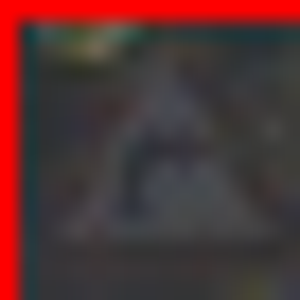

In [59]:
# ROI를 통해서 이미지 중 중요한 부분ㅁ나 crop
img_sample_crop = img_sample.crop((df_Train['Roi.X1'][0], df_Train['Roi.Y1'][0], df_Train['Roi.X2'][0], df_Train['Roi.Y2'][0]))
 
# Shows the image in image viewer
img_sample_crop_resized = img_sample_crop.resize((300,300))
img_sample_crop_resized

In [60]:
df_Test = pd.read_csv('./data/Test.csv')
df_Test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


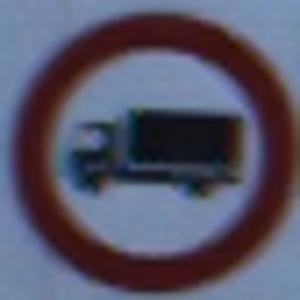

In [61]:
# crop함수를 활용하여 이미지를 잘라낼 수 있습니다.
# 이 후, resize함수를 활용하여 사이즈 변경을 수행합니다.
img_sample_test = Image.open('./data/' + df_Test['Path'][0])
img_sample_crop = img_sample_test.crop((df_Test['Roi.X1'][0], df_Test['Roi.Y1'][0], df_Test['Roi.X2'][0], df_Test['Roi.Y2'][0]))


img_sample_crop_resized = img_sample_crop.resize((300,300))
img_sample_crop_resized

In [62]:
# 데이터 전처리

In [63]:
# image_height = 33
# image_width = 33
# image_channel = 3

image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channel = x_train.shape[3]

Train_images = []
Train_labels = []

for i in tqdm(range(len(df_Train))):
    img = load_img('./data/'+df_Train['Path'][i], target_size = (image_height, image_width))
    img = img_to_array(img)
    Train_images.append(img)

Train_labels = df_Train['ClassId'].values
Train_labels

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39209/39209 [00:08<00:00, 4782.57it/s]


array([20, 20, 20, ..., 42, 42, 42])

In [64]:
Test_images = []
Test_labels = []

for i in tqdm(range(len(df_Test))):
    img = load_img('./data/'+df_Test['Path'][i], target_size = (image_height, image_width))
    img = img_to_array(img)
    Test_images.append(img)

Test_labels = df_Test['ClassId'].values
Test_labels

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12630/12630 [00:02<00:00, 4847.72it/s]


array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
# label 데이터 읽기
# training, test 데이터의 각 label은 csv파일 속 'ClassId' 컬럼에 저장되어 있다.
# 데이터 분리하기
# 딥러닝 학습 시 과적합을 막기위해 validation 데이터를 training 데이터에서 분리한다.
# 이들을 numpy array로 저장한다.

print(len(Train_images), len(Train_labels))

In [65]:
# x_train, y_train → 학습(Training) 데이터 (60%)
# x_val, y_val → 검증(Validation) 데이터 (40%)
x_train, x_val, y_train, y_val = train_test_split(np.array(Train_images), np.array(Train_labels), test_size=0.4)

x_test = np.array(Test_images)
y_test = np.array(Test_labels)

In [53]:
# 딥러닝 CNN 모델

In [71]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [73]:
model = Sequential([    
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(image_height, image_width, image_channel)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25), # 학습할 때 25% 노드를 사용하지 않는다. 과적합 방지
    # 그러나 학습을 완료해서 predict할 때는 모든 노드를 사용함.
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.25),
    Dense(43, activation='softmax') # 클래스 3가지로 분류.
])

model.summary()
# 새로운 Sequential 모델 인스턴스가 매번 새로 생성됩니다.
# TensorFlow 내부적으로 모델에 자동으로 이름을 붙이는데, 같은 이름이 중복되지 않도록 "sequential", "sequential_1", "sequential_2" 이런 식으로 숫자를 붙입니다.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,611 (4.66 MB)

 Trainable params: 1,221,611 (4.66 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
    
EPOCHS = 5

history = model.fit(
    x_train, 
    y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)

Epoch 1/5
736/736 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3171 - loss: 3.6806 - val_accuracy: 0.6061 - val_loss: 1.3361
Epoch 2/5
736/736 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6955 - loss: 1.0269 - val_accuracy: 0.8868 - val_loss: 0.4272
Epoch 3/5
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8196 - loss: 0.6048 - val_accuracy: 0.9283 - val_loss: 0.2641
Epoch 4/5
736/736 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8749 - loss: 0.4244 - val_accuracy: 0.9577 - val_loss: 0.1575
Epoch 5/5
736/736 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8884 - loss: 0.3818 - val_accuracy: 0.9566 - val_loss: 0.1594


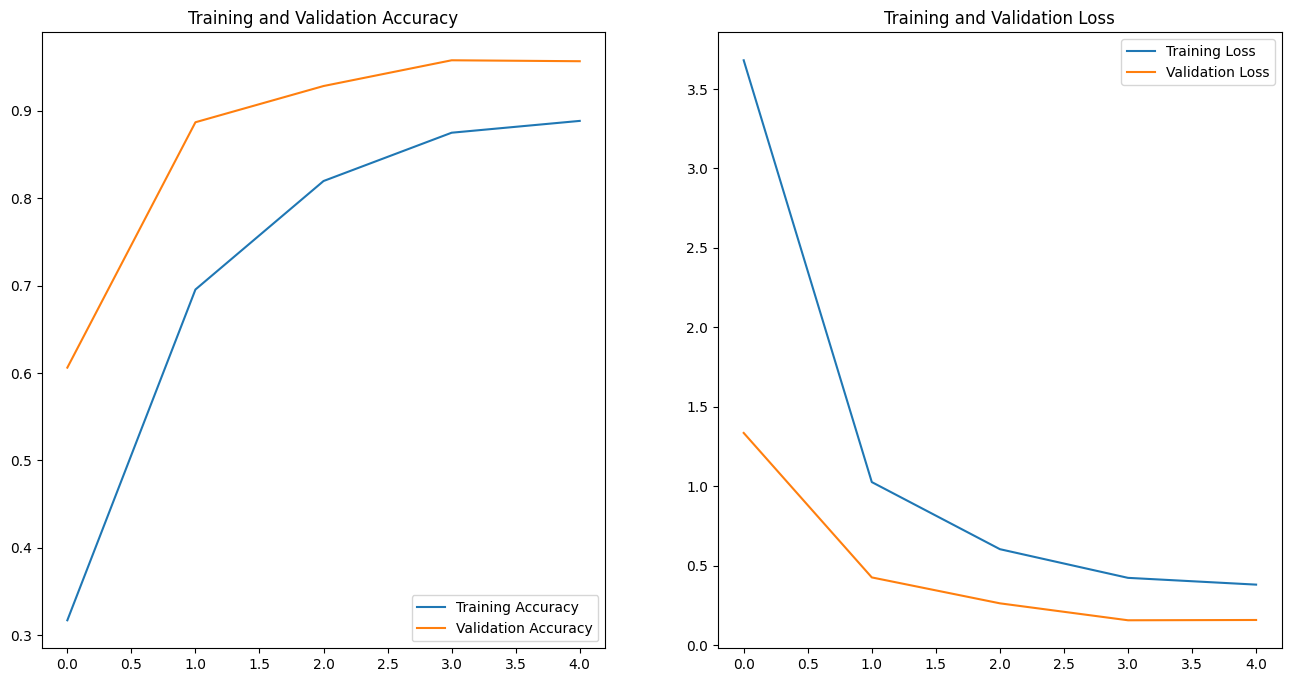

In [75]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print('test set accuracy: ', test_accuracy)

test set accuracy:  0.9003167152404785


In [77]:
test_prediction = np.argmax(model.predict(x_test), axis=-1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


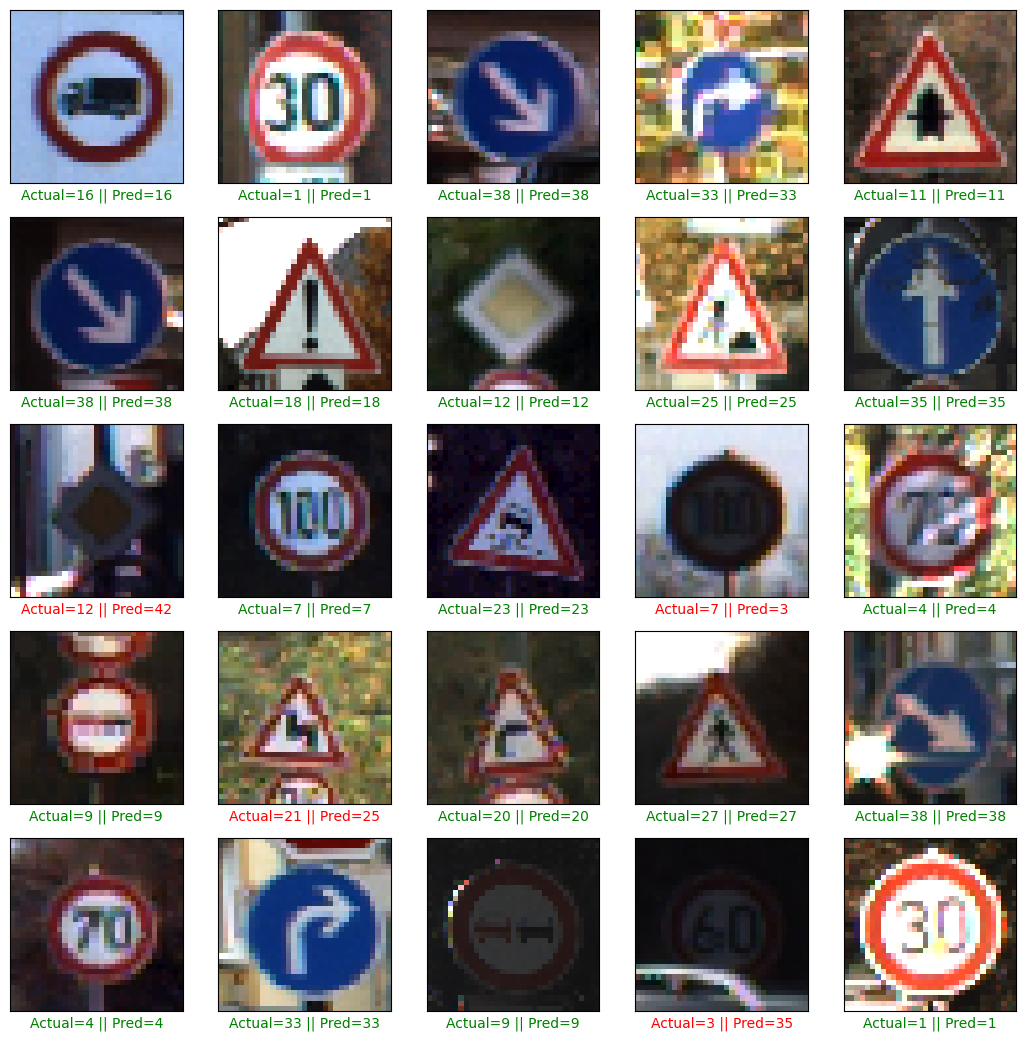

In [78]:
# predict결과를 시각화해본다.
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = test_prediction[start_index + i]
    actual = y_test[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(array_to_img(x_test[start_index + i]))
plt.show()

<Axes: >

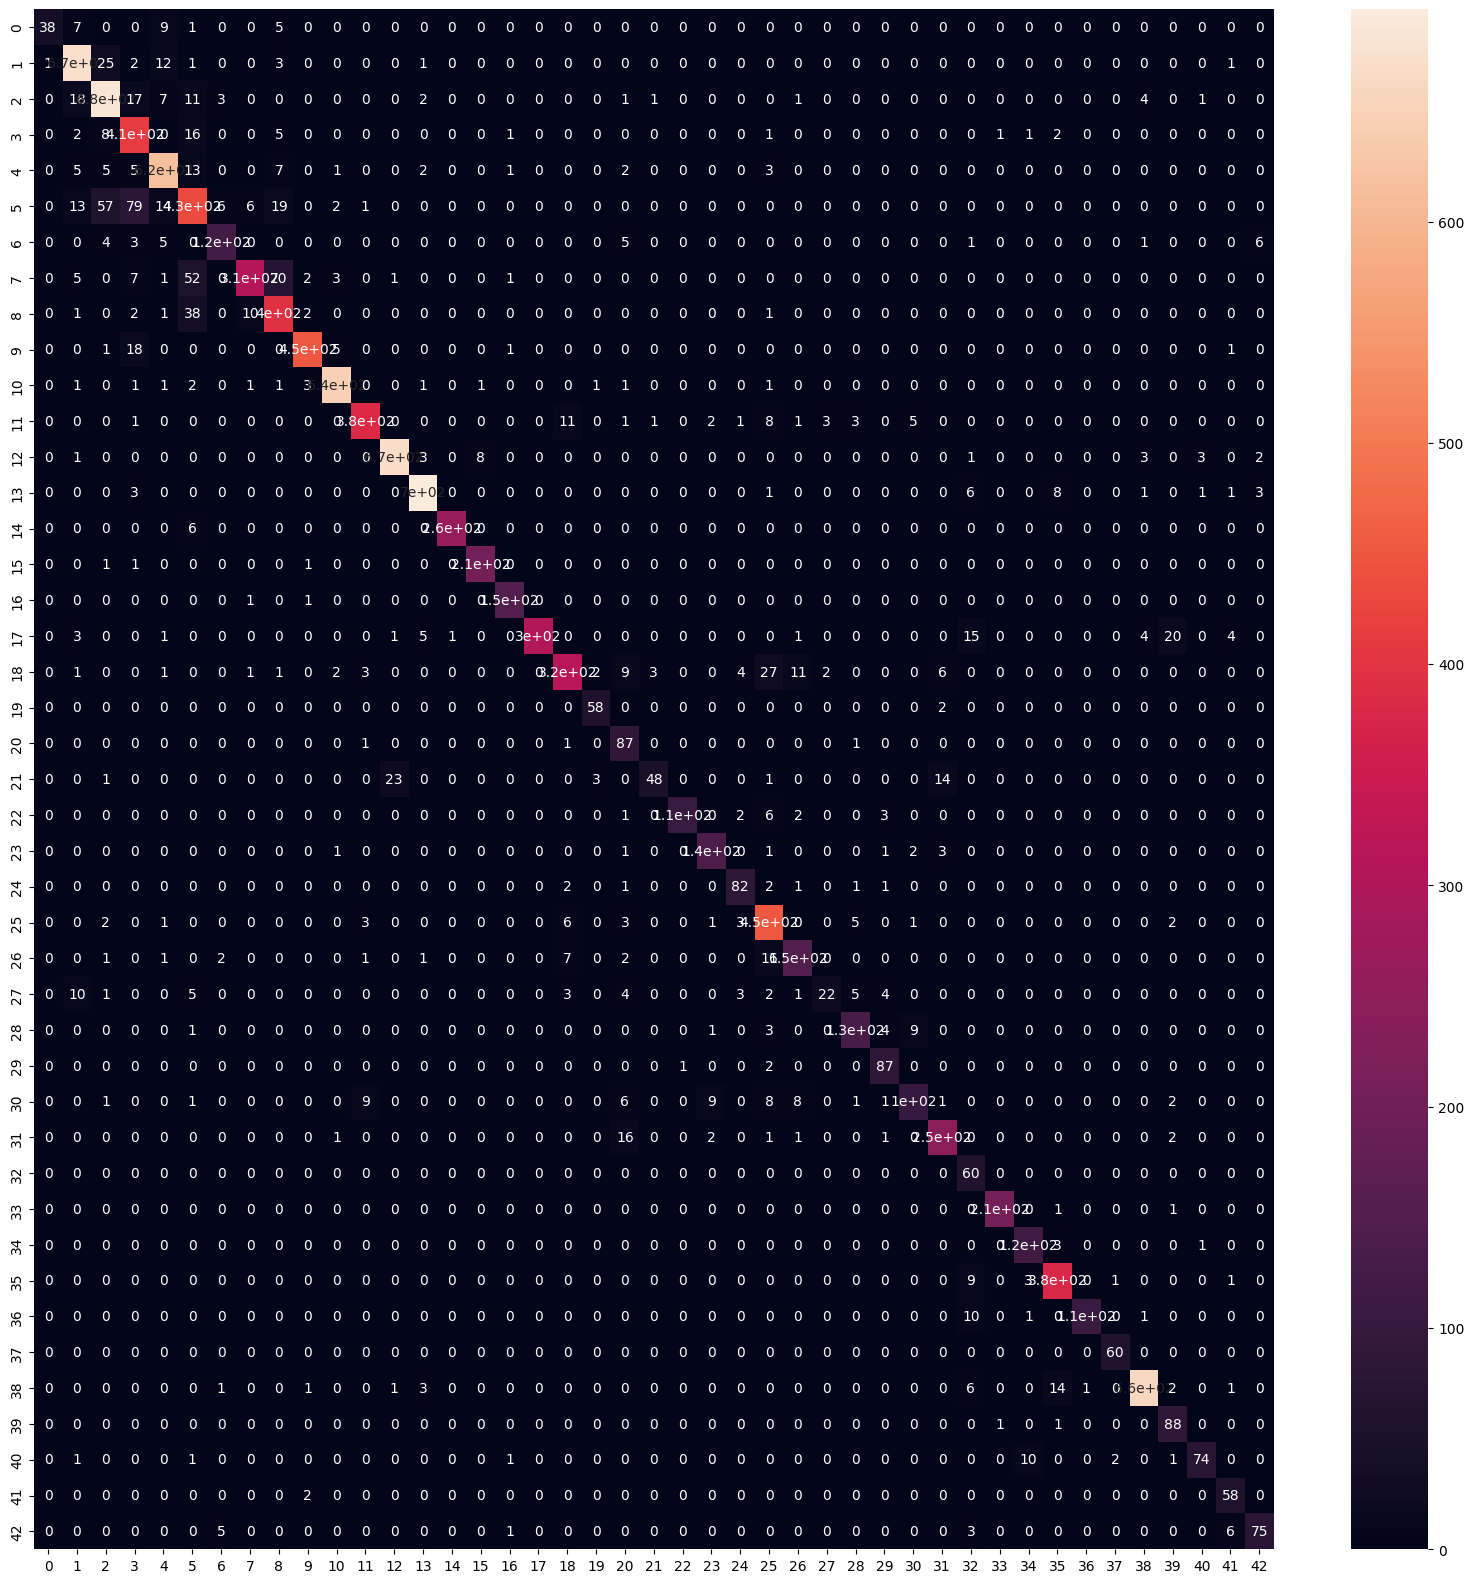

In [79]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_prediction)
plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)

Epoch 1/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9262 - loss: 0.2944 - val_accuracy: 0.9617 - val_loss: 0.1490
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9268 - loss: 0.2904 - val_accuracy: 0.9742 - val_loss: 0.0956
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9281 - loss: 0.2953 - val_accuracy: 0.9728 - val_loss: 0.1018
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9350 - loss: 0.2610 - val_accuracy: 0.9634 - val_loss: 0.1428
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9384 - loss: 0.2547 - val_accuracy: 0.9772 - val_loss: 0.1028
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9323 - loss: 0.2925 - val_accuracy: 0.9732 - val_loss: 0.1141
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9334 - loss: 0.2796 - val_accuracy: 0.9740 - val_loss: 0.1066
Epoch 8/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9373 - loss: 0.2917 - 

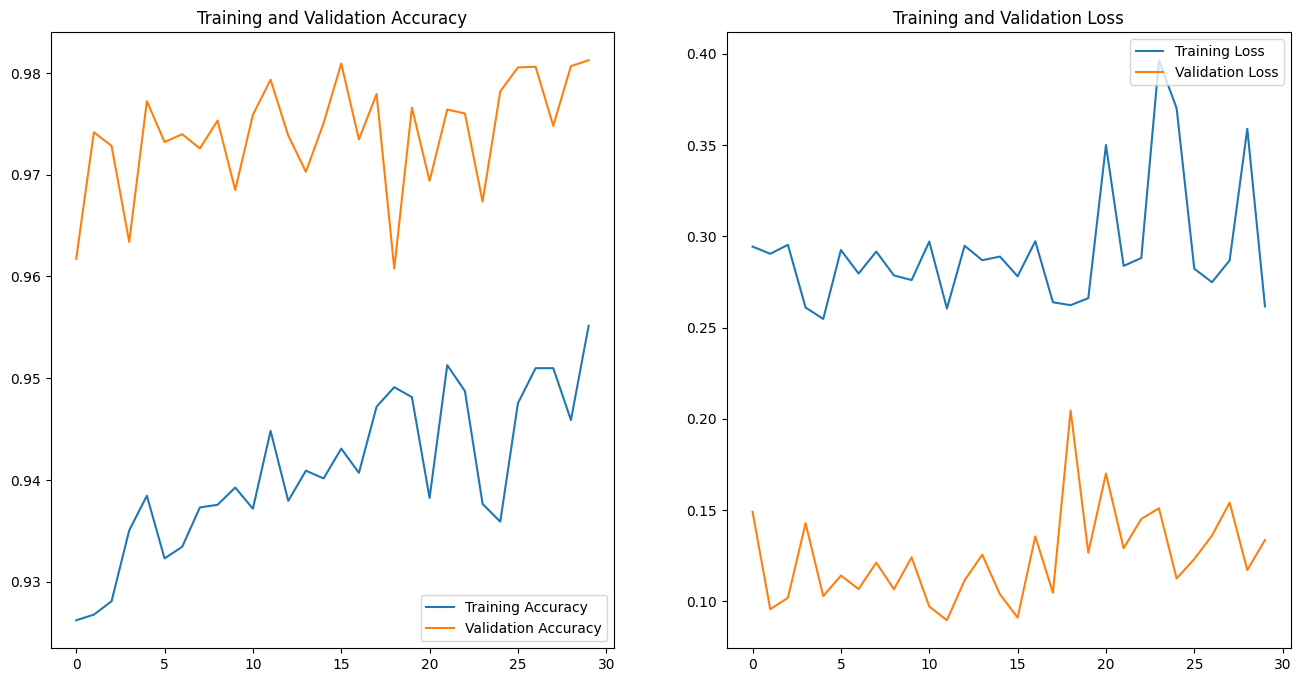

test set accuracy:  0.9173396825790405
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [81]:
EPOCHS = 30

history = model.fit(
    x_train, 
    y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print('test set accuracy: ', test_accuracy)

test_prediction = np.argmax(model.predict(x_test), axis=-1)